In [180]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'C:\\Users\\DELL\\Numpy'

In [181]:
data=pd.read_csv("C:\\Users\\DELL\\Numpy\exams.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [182]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [184]:
data.shape

(1000, 8)

In [185]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [186]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [187]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
w=['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']
for i in w:
    data[i]=le.fit_transform(data[i])
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,37,40,51
1,1,3,0,1,1,74,63,60
2,0,3,4,0,1,35,46,50
3,1,1,4,0,1,48,40,36
4,0,3,0,1,1,61,55,59
...,...,...,...,...,...,...,...,...
995,1,2,4,1,1,55,47,44
996,1,2,4,1,1,58,36,39
997,0,0,2,1,0,45,56,59
998,1,4,2,1,1,58,42,35


<Axes: >

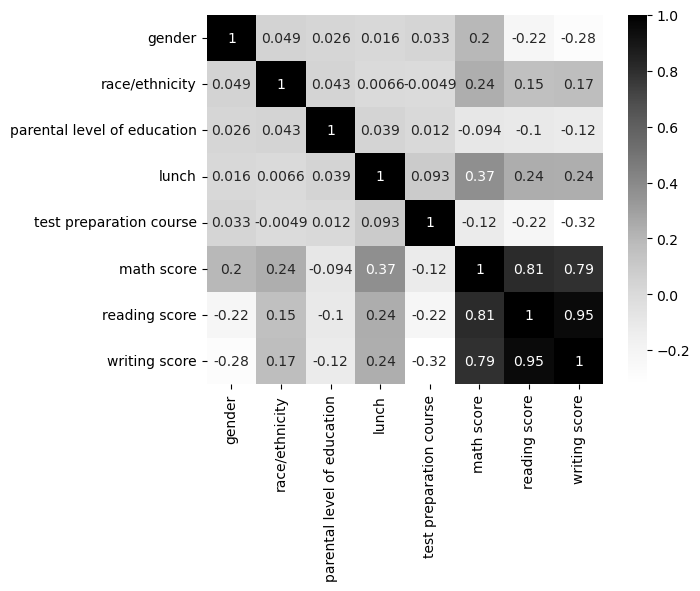

In [188]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap="Greys")

In [189]:
x=data.drop("reading score",axis=1)
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,writing score
0,0,3,4,1,0,37,51
1,1,3,0,1,1,74,60
2,0,3,4,0,1,35,50
3,1,1,4,0,1,48,36
4,0,3,0,1,1,61,59
...,...,...,...,...,...,...,...
995,1,2,4,1,1,55,44
996,1,2,4,1,1,58,39
997,0,0,2,1,0,45,59
998,1,4,2,1,1,58,35


In [190]:
y=data["reading score"]
y

0      40
1      63
2      46
3      40
4      55
       ..
995    47
996    36
997    56
998    42
999    17
Name: reading score, Length: 1000, dtype: int64

In [191]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.18,random_state=0) 

In [192]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [193]:
accuracy=(rf.score(xtest,ytest)*100)
accuracy

89.11099620384151

In [194]:
predict1=(rf.score(xtrain,ytrain))*100
predict1

98.55026999425559

In [195]:
s=[[0,3,4,0,1,35,50]]
d=rf.predict(s)
d

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([46.06])

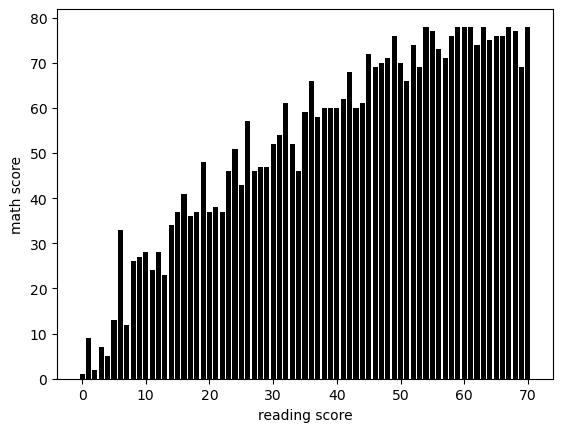

In [197]:
import matplotlib.pyplot as plt
x=data["reading score"]
y=data["math score"]
plt.bar(x,y,color="black")
plt.xlabel("reading score")
plt.ylabel("math score")
plt.show()